# Lab 6: Unsupervised Learning II - Dimensionality Reduction

In this lab, we will cover the following topics:
1. Dimensionality reduction techniques:
   * PCA
   * t-SNE
   * UMAP
2. Visualization and interpretation

Each section includes basic implementation and questions for further exploration.

## 1. Dimensionality Reduction

### 1.1 Principal Component Analysis (PCA)

We will start by implementing PCA for dimensionality reduction. We will also explore different parameters and visualize the results.

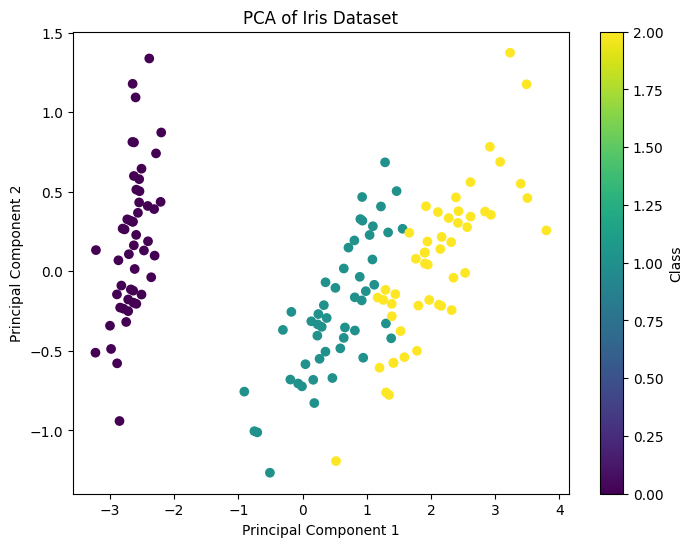

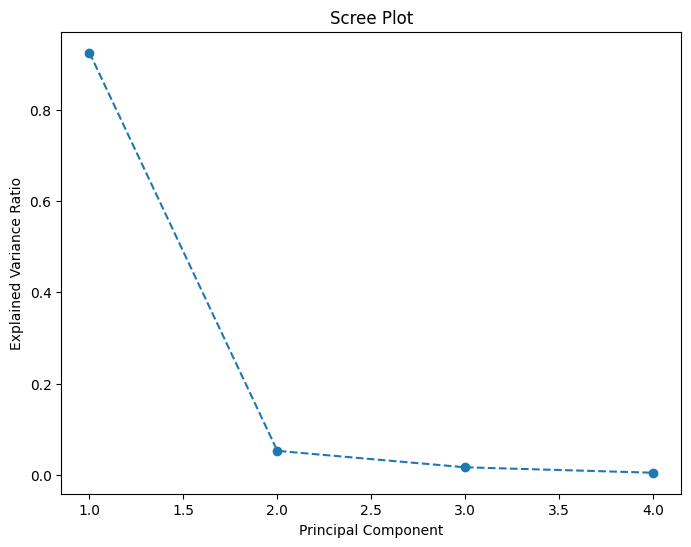

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### Questions for Exploration

1. How does changing the number of principal components (`n_components`) affect the explained variance ratio?

As more components are added, these additional components explain less and less of the observed variance than the component before it. If the first PC explains 90% of the variance, no matter how many components you add, there is only 10% of the variance left to explain. 

2. What happens to the visualization when you use more or fewer principal components?

An elbow is formed, indicating a steep drop off in the explained variance for each subsequent component.

3. How does the choice of dataset affect the PCA results and their interpretation?

Complex datasets may need more principal components to explain a majority of the observed variation.


### 1.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

Next, we will implement t-SNE for dimensionality reduction. We will also explore different parameters and visualize the results.

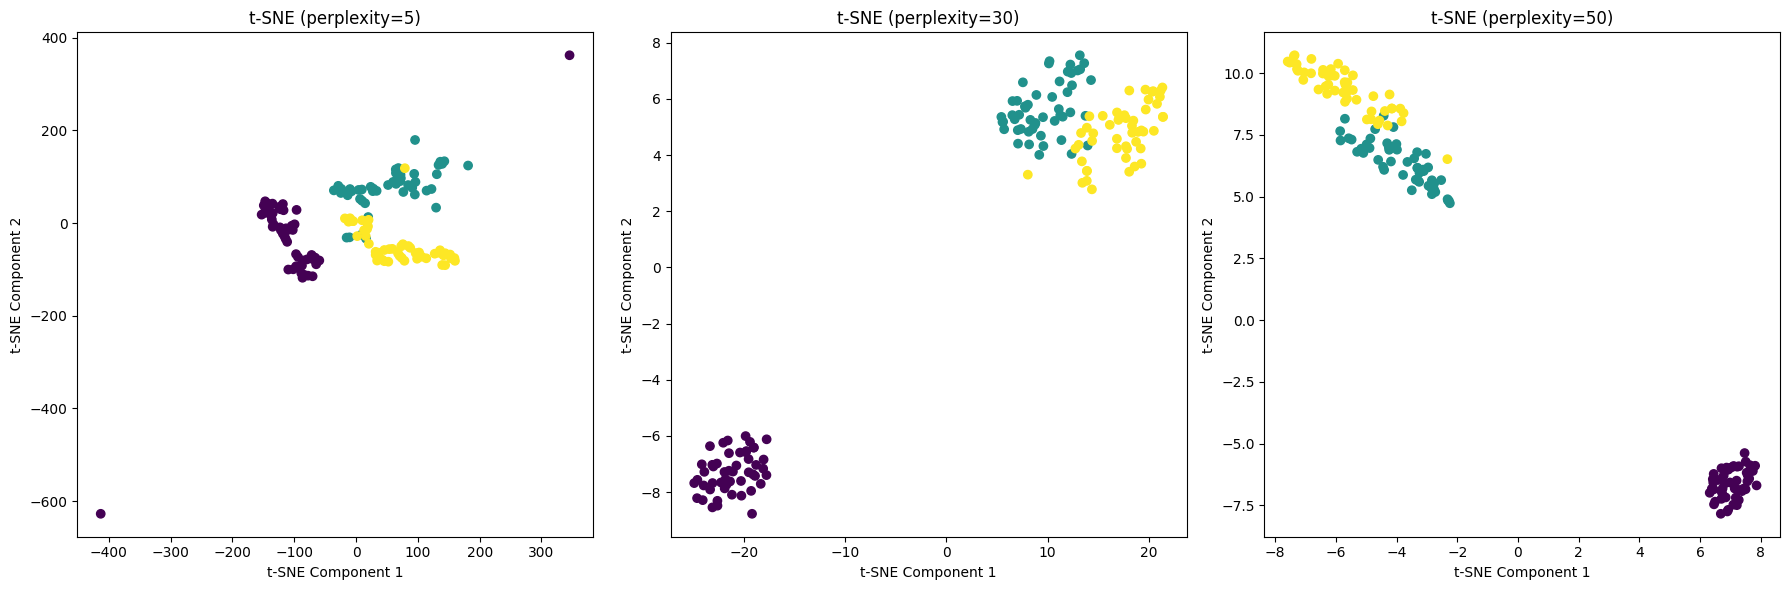

In [31]:
from sklearn.manifold import TSNE

# Perform t-SNE with different perplexity values
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, learning_rate=300)
    X_tsne = tsne.fit_transform(X)
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f't-SNE (perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the perplexity parameter affect the t-SNE visualization?

Perplexities that are too low or too high result in clusters that are spread out. Perplexity values that are closer to the model's ideal value result in clusters that are tighter and more well defined.

2. What happens to the visualization when you change the learning rate?

The effect of learning rate on the clustering patterns depends upon the perplexity value. 

Learning rates too low: dense cloud of points
Learning rates too high: spread out circular cloud


3. How does the choice of dataset affect the t-SNE results and their interpretation?



### 1.3 Uniform Manifold Approximation and Projection (UMAP)

Finally, we will implement UMAP for dimensionality reduction. We will also explore different parameters and visualize the results.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: Futu

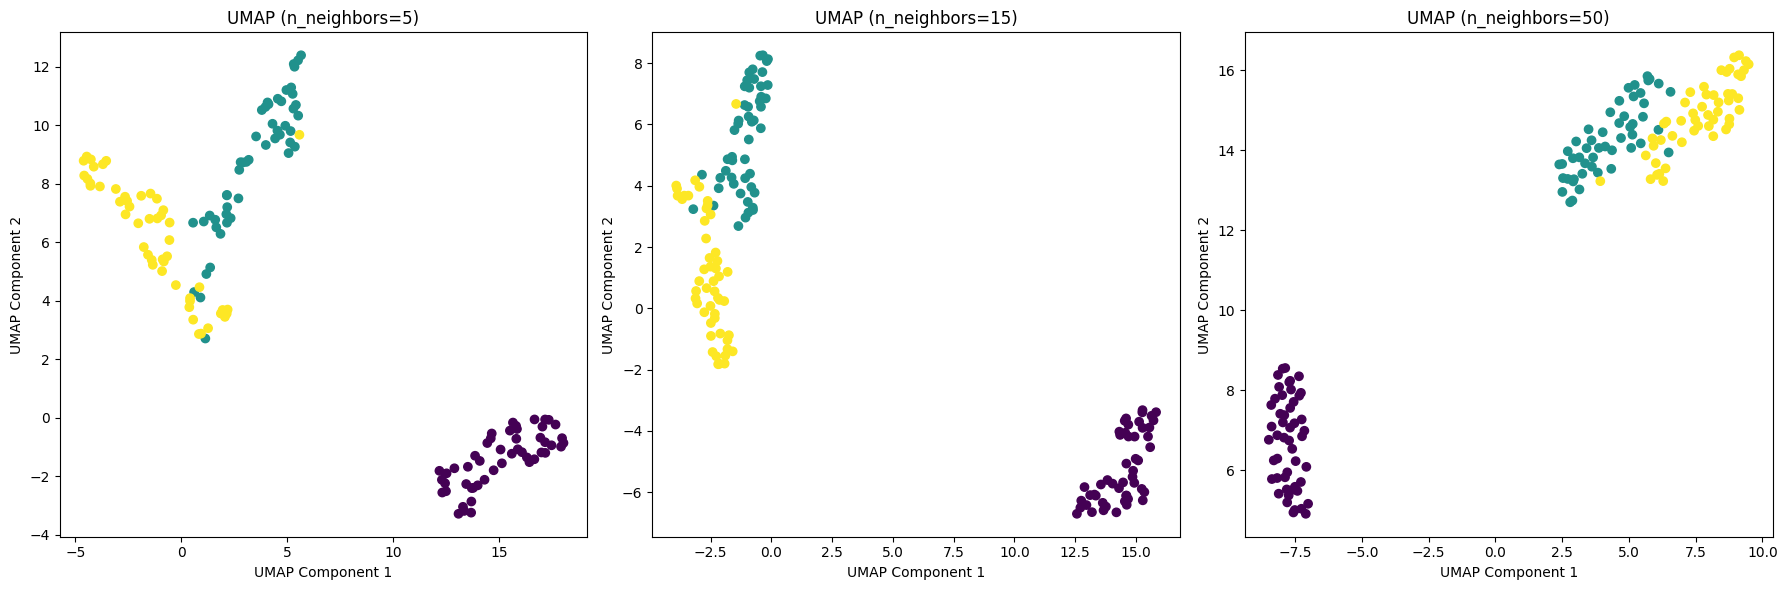

Trustworthiness of PCA: 1.000
Trustworthiness of t-SNE: 0.982
Trustworthiness of UMAP: 0.975


In [32]:
import umap

# Perform UMAP with different n_neighbors values
n_neighbors_values = [5, 15, 50]
fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(18, 6))

for i, n_neighbors in enumerate(n_neighbors_values):
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.3, random_state=42)
    X_umap = umap_reducer.fit_transform(X)
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('UMAP Component 1')
    axes[i].set_ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()

from sklearn.manifold import trustworthiness
 
# Calculate trustworthiness for PCA
trust_pca = trustworthiness(X, X_pca)
print(f'Trustworthiness of PCA: {trust_pca:.3f}')
 
# Calculate trustworthiness for t-SNE
trust_tsne = trustworthiness(X, X_tsne)
print(f'Trustworthiness of t-SNE: {trust_tsne:.3f}')
 
# Calculate trustworthiness for UMAP
trust_umap = trustworthiness(X, X_umap)
print(f'Trustworthiness of UMAP: {trust_umap:.3f}')

### Questions for Exploration

1. How does changing the number of neighbors (`n_neighbors`) affect the UMAP visualization?

Low number of neighbours causes model to focus on local structure of data.
Higher number of neighbours causes model to focus on global structure. 
Tuning this parameter should give you a good balance of preserving the variance explained by local and global structure.

2. What happens to the visualization when you change the minimum distance (`min_dist`)?

Literally just spaces out or condenses the same clusters that were already defined. ??

3. How does the choice of dataset affect the UMAP results and their interpretation?

Depending on how much of the variance is explained by local or global structure, different values for the n_neighbours and min_dist will be optimal. 

## 2. Visualization and Interpretation

We will visualize and interpret the results of different dimensionality reduction techniques. We will also explore different visualization techniques.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


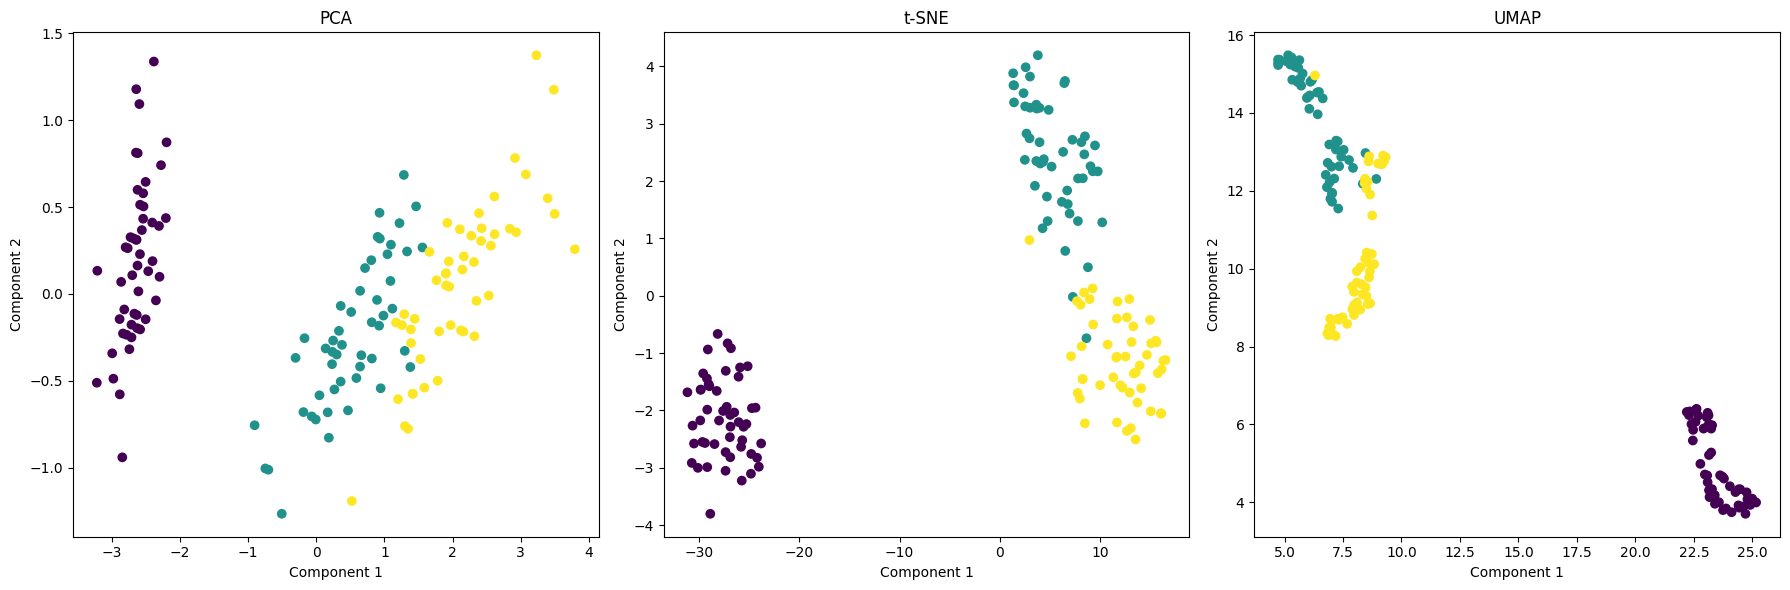

In [33]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[0].set_title('PCA')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axes[1].set_title('t-SNE')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
axes[2].set_title('UMAP')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How do the visualizations of PCA, t-SNE, and UMAP compare?
2. What are the strengths and weaknesses of each dimensionality reduction technique?



3. How does the choice of parameters affect the visualization and interpretation of each technique?

## Extensions

1. Apply clustering algorithms (e.g., k-Means) on the reduced dimensions obtained from PCA, t-SNE, and UMAP.
    * How do the clustering results compare when using different dimensionality reduction techniques?
2. Use quantitative metrics (e.g., trustworthiness, continuity) to evaluate the quality of the dimensionality reduction.
    * How do PCA, t-SNE, and UMAP compare based on these metrics?
Handling High-Dimensional Data
3. Use PCA to reduce noise in a dataset by retaining only the top principal components.
    * How does this noise reduction affect the performance of downstream tasks (e.g., classification, clustering)?
4. Explore other dimensionality reduction techniques such as Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), and Isomap.
    * How do these techniques compare to PCA, t-SNE, and UMAP in terms of visualization and interpretation?